# Simulation Open Loop Process (OLP)


In [89]:
#import

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

from importlib import reload


In [91]:
# definition of parameters

In [92]:
Kp = 0.375
Tu = 26
Tg = 186
t1 = 95
t2 = 126
a = 0.065
e = 2.71828
n = 2
Ts = 1 # value imposed


In [93]:
# Load Data

In [94]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2025-03-10-13h46.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


In [95]:
# Plot loaded data

(0.0, 455.0)

<Figure size 2200x2200 with 0 Axes>

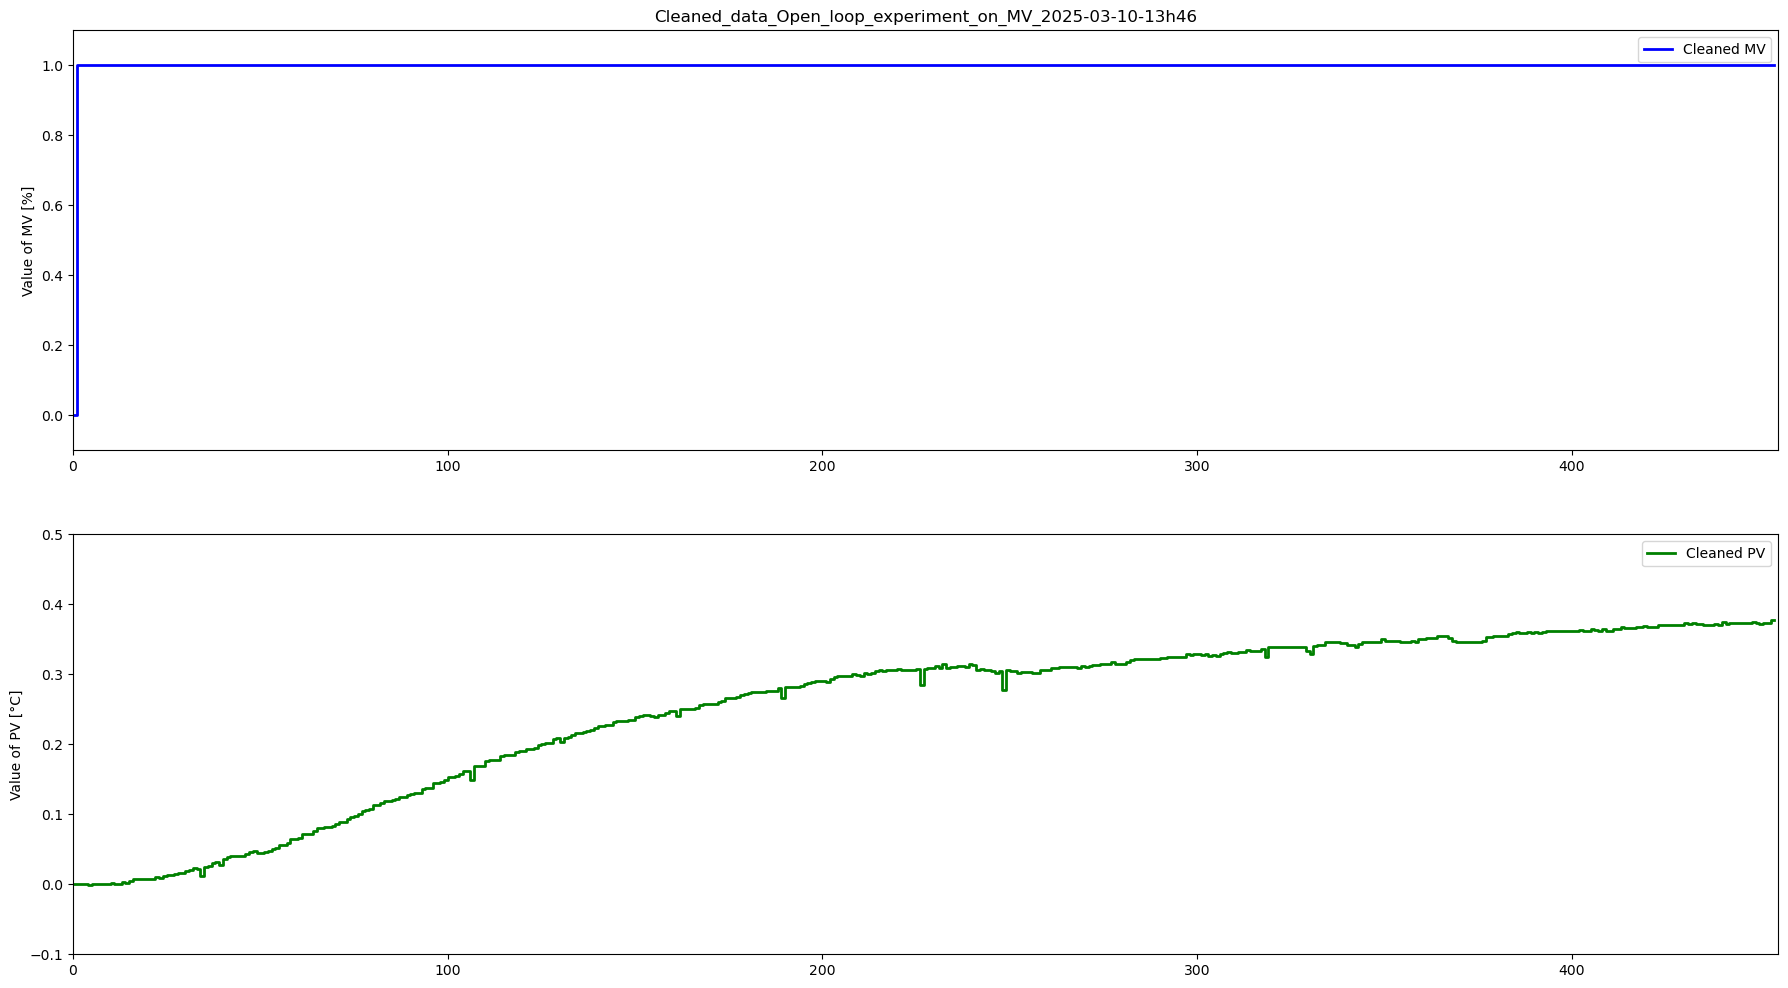

In [96]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, tm[-1]+1)
ax2.set_xlim(0, tm[-1]+1)

In [97]:
# Broida 1

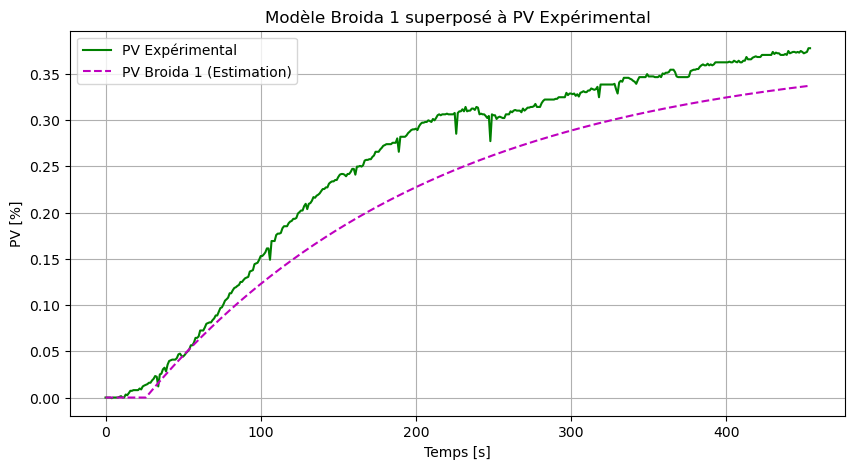

In [98]:
# Paramètres estimés selon Broida 1
Kp_Broida = Kp
T_Broida = Tg
theta_Broida = Tu
num_B1 = [Kp]  # Numérateur : Kp
den_B1 = [Tg, 1]  # Dénominateur : (Tg * s + 1)

# Application du modèle FOPDT avec ces paramètres
PV_Broida = FOPDT(MV=MVm, Kp=Kp_Broida, T=T_Broida, theta=theta_Broida, Ts=Ts, PVInit=0, method='EBD')

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(tm, PVm, 'g-', label="PV Expérimental")
plt.plot(tm, PV_Broida, 'm--', label="PV Broida 1 (Estimation)")
plt.xlabel("Temps [s]")
plt.ylabel("PV [%]")
plt.legend()
plt.title("Modèle Broida 1 superposé à PV Expérimental")
plt.grid()
plt.show()


In [99]:
# Broida 2

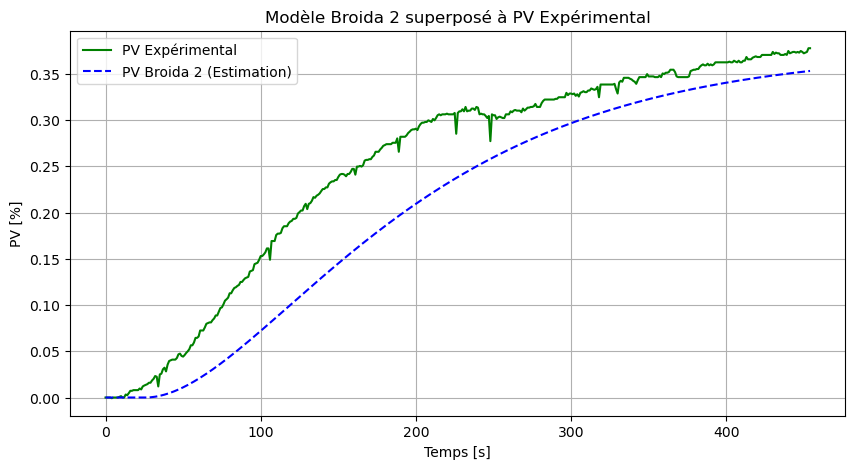

In [100]:
# Paramètres estimés selon Broida 2
Kp_Broida2 = Kp
T1_Broida2 = 0.5 * (Tg + Tu)  # Première constante de temps
T2_Broida2 = 0.5 * (Tg - Tu)  # Deuxième constante de temps
theta_Broida2 = Tu  # Temps mort
num_B2 = [Kp]
den_B2 = np.convolve([0.5 * (Tg + Tu), 1], [0.5 * (Tg - Tu), 1])  # Produit des polynômes (T1 * s + 1)(T2 * s + 1)


# Application du modèle SOPDT avec ces paramètres
PV_Broida2 = SOPDT(MV=MVm, Kp=Kp_Broida2, T1=T1_Broida2, T2=T2_Broida2, theta=theta_Broida2, Ts=Ts, PVInit=0, method='EBD')

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(tm, PVm, 'g-', label="PV Expérimental")
plt.plot(tm, PV_Broida2, 'b--', label="PV Broida 2 (Estimation)")
plt.xlabel("Temps [s]")
plt.ylabel("PV [%]")
plt.legend()
plt.title("Modèle Broida 2 superposé à PV Expérimental")
plt.grid()
plt.show()


In [101]:
# Modèle Van der Grinten

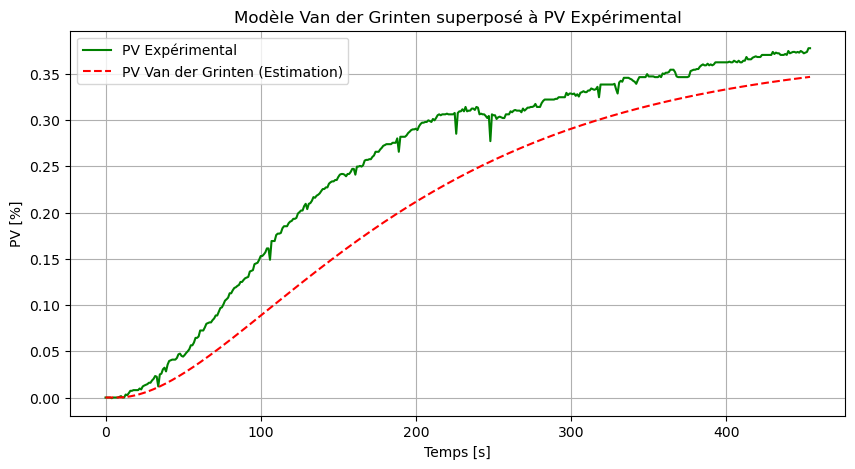

In [102]:
# Paramètres estimés selon Van der Grinten
Kp_VDG = Kp
T1_VDG = 0.67 * Tg + 0.33 * Tu  # Première constante de temps
T2_VDG = 0.29 * Tg + 0.71 * Tu  # Deuxième constante de temps
theta_VDG = 0.3 * Tu  # Temps mort
num_VDG = [Kp]
den_VDG = np.convolve([0.67 * Tg + 0.33 * Tu, 1], [0.29 * Tg + 0.71 * Tu, 1])  # Produit des polynômes

# Application du modèle SOPDT avec ces paramètres
PV_VDG = SOPDT(MV=MVm, Kp=Kp_VDG, T1=T1_VDG, T2=T2_VDG, theta=theta_VDG, Ts=Ts, PVInit=0, method='EBD')

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(tm, PVm, 'g-', label="PV Expérimental")
plt.plot(tm, PV_VDG, 'r--', label="PV Van der Grinten (Estimation)")
plt.xlabel("Temps [s]")
plt.ylabel("PV [%]")
plt.legend()
plt.title("Modèle Van der Grinten superposé à PV Expérimental")
plt.grid()
plt.show()


In [103]:
# Modèle Strejc

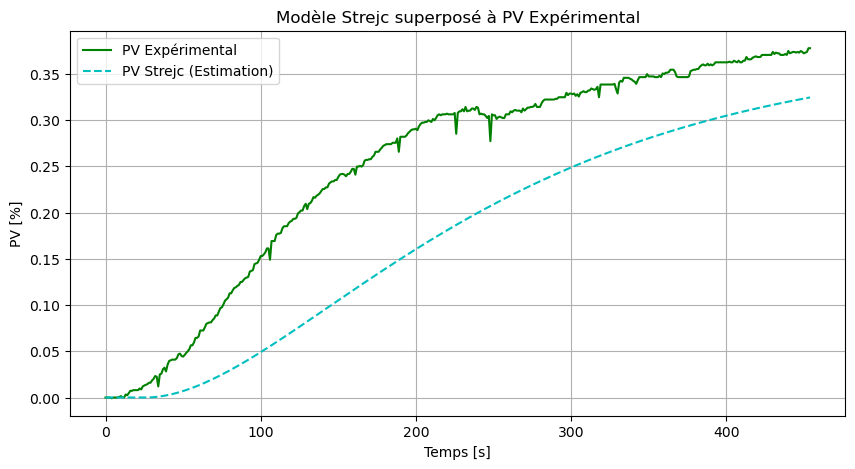

In [104]:
# Paramètres estimés selon Strejc
Kp_Strejc = Kp
T1_Strejc = 0.8 * Tg  # Première constante de temps
T2_Strejc = 0.5 * Tg  # Deuxième constante de temps
theta_Strejc = Tu  # Temps mort
num_Strejc = [Kp]
den_Strejc = np.convolve([0.8 * Tg, 1], [0.5 * Tg, 1])  # Produit des polynômes



# Application du modèle SOPDT avec ces paramètres
PV_Strejc = SOPDT(MV=MVm, Kp=Kp_Strejc, T1=T1_Strejc, T2=T2_Strejc, theta=theta_Strejc, Ts=Ts, PVInit=0, method='EBD')

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(tm, PVm, 'g-', label="PV Expérimental")
plt.plot(tm, PV_Strejc, 'c--', label="PV Strejc (Estimation)")
plt.xlabel("Temps [s]")
plt.ylabel("PV [%]")
plt.legend()
plt.title("Modèle Strejc superposé à PV Expérimental")
plt.grid()
plt.show()


In [105]:
# Plot Experimental PV compared to GRAPH METHODS

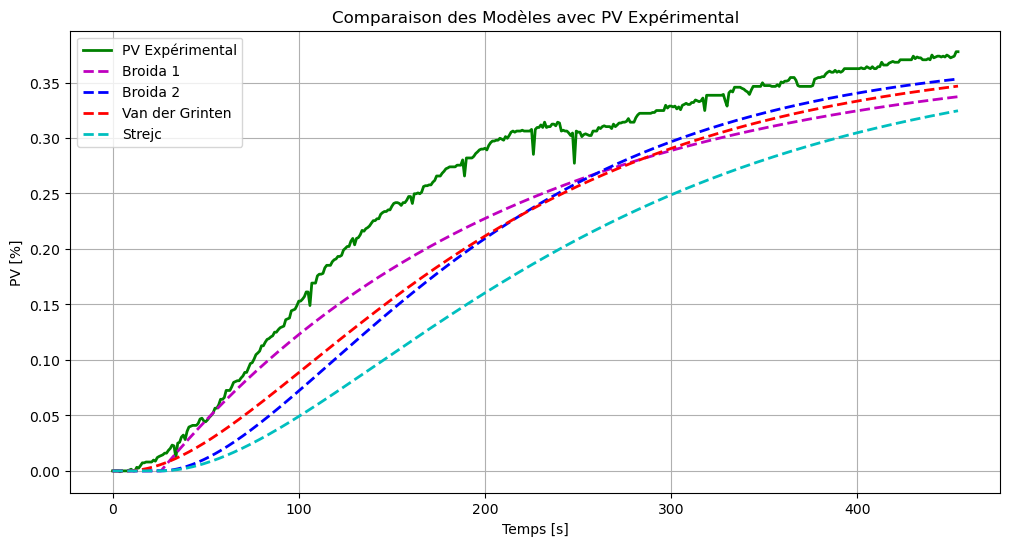

In [106]:

# --- Définition des couleurs pour chaque modèle ---
colors = {
    "Expérimental": "g-",  # Vert plein
    "Broida 1": "m--",     # Magenta pointillé
    "Broida 2": "b--",     # Bleu pointillé
    "Van der Grinten": "r--",  # Rouge pointillé
    "Strejc": "c--"        # Cyan pointillé
}

# --- Tracé des courbes ---
plt.figure(figsize=(12, 6))

# PV Expérimental (Référence)
plt.plot(tm, PVm, colors["Expérimental"], linewidth=2, label="PV Expérimental")

# Modèle Broida 1
plt.plot(tm, PV_Broida, colors["Broida 1"], linewidth=2, label="Broida 1")

# Modèle Broida 2
plt.plot(tm, PV_Broida2, colors["Broida 2"], linewidth=2, label="Broida 2")

# Modèle Van der Grinten
plt.plot(tm, PV_VDG, colors["Van der Grinten"], linewidth=2, label="Van der Grinten")

# Modèle Strejc
plt.plot(tm, PV_Strejc, colors["Strejc"], linewidth=2, label="Strejc")

# --- Configuration du graphique ---
plt.xlabel("Temps [s]")
plt.ylabel("PV [%]")
plt.legend()
plt.title("Comparaison des Modèles avec PV Expérimental")
plt.grid()
plt.show()


In [107]:
# Plot Bode Diagramme

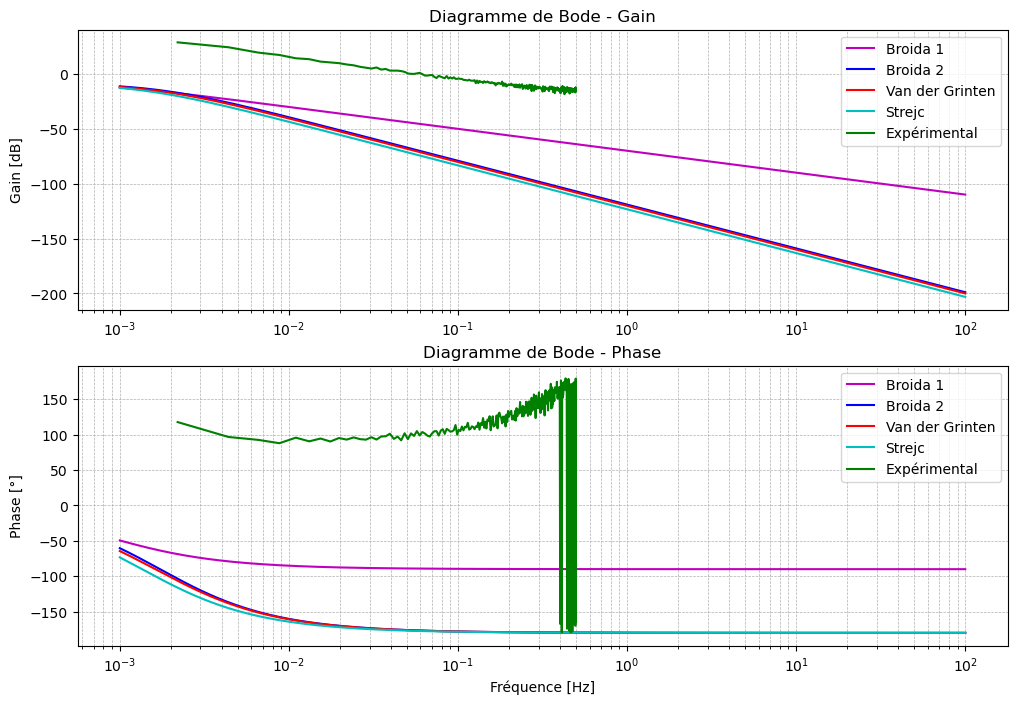

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# --- Définition des fréquences pour l'analyse de Bode ---
frequencies = np.logspace(-3, 2, 500)  # Gamme de fréquences (0.001 Hz à 100 Hz)
w = 2 * np.pi * frequencies  # Conversion en pulsations rad/s

# --- Calcul des réponses en fréquence pour chaque modèle ---
_, H_Broida1 = freqs(num_B1, den_B1, worN=w)
_, H_Broida2 = freqs(num_B2, den_B2, worN=w)
_, H_VDG = freqs(num_VDG, den_VDG, worN=w)
_, H_Strejc = freqs(num_Strejc, den_Strejc, worN=w)

# --- Réponse en fréquence expérimentale (FFT) ---
PV_exp_fft = np.fft.fft(PVm)  # Transformée de Fourier de PV expérimental
freq_exp = np.fft.fftfreq(len(PVm), d=Ts)  # Fréquences associées
w_exp = 2 * np.pi * freq_exp  # Conversion en rad/s

# --- Sélection des fréquences positives ---
mask = freq_exp > 0
PV_exp_fft = PV_exp_fft[mask]
w_exp = w_exp[mask]

# --- Tracé des Diagrammes de Bode ---
plt.figure(figsize=(12, 8))

# Module (Gain en dB)
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, 20 * np.log10(abs(H_Broida1)), 'm-', label="Broida 1")
plt.semilogx(frequencies, 20 * np.log10(abs(H_Broida2)), 'b-', label="Broida 2")
plt.semilogx(frequencies, 20 * np.log10(abs(H_VDG)), 'r-', label="Van der Grinten")
plt.semilogx(frequencies, 20 * np.log10(abs(H_Strejc)), 'c-', label="Strejc")
plt.semilogx(w_exp / (2 * np.pi), 20 * np.log10(abs(PV_exp_fft)), 'g-', label="Expérimental")  # Courbe Expérimentale
plt.ylabel("Gain [dB]")
plt.title("Diagramme de Bode - Gain")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Phase (en degrés)
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, np.angle(H_Broida1, deg=True), 'm-', label="Broida 1")
plt.semilogx(frequencies, np.angle(H_Broida2, deg=True), 'b-', label="Broida 2")
plt.semilogx(frequencies, np.angle(H_VDG, deg=True), 'r-', label="Van der Grinten")
plt.semilogx(frequencies, np.angle(H_Strejc, deg=True), 'c-', label="Strejc")
plt.semilogx(w_exp / (2 * np.pi), np.angle(PV_exp_fft, deg=True), 'g-', label="Expérimental")  # Phase Expérimentale
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Phase [°]")
plt.title("Diagramme de Bode - Phase")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

#  Affichage du graphique
plt.show()
